In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mymoviedb.csv', engine='python')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


chacking for Dublicates

In [6]:
df.duplicated().sum()

np.int64(0)

Changing Datatype

In [7]:
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce').fillna(0)
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'].replace('en', 0), errors='coerce').fillna(0).astype(np.int64)
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'].astype(str).str.strip().replace('Animation', '0'), errors='coerce').fillna(0)

In [8]:
non_numeric_votes = df[pd.to_numeric(df['Vote_Count'], errors='coerce').isna()]['Vote_Count'].unique()
print(f"Non-numeric values in 'Vote_Count': {non_numeric_votes}")
print(f"Number of non-numeric values in 'Vote_Count': {len(df[pd.to_numeric(df['Vote_Count'], errors='coerce').isna()])}")

Non-numeric values in 'Vote_Count': []
Number of non-numeric values in 'Vote_Count': 0


In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9837.000000,9837.000000,9837.000000
mean,40.279581,1391.386093,6.432266
std,108.826535,2610.258502,1.149494
min,0.000000,0.000000,0.000000
25%,16.115000,146.000000,5.900000
50%,21.158000,443.000000,6.500000
75%,35.160000,1375.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
print(df['Release_Date'].dtypes)

datetime64[ns]


In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the Columns

In [12]:
col = ['Overview', 'Original_Language', 'Poster_Url']

In [13]:
df.drop(col, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Categorizing Vote_Average column

In [14]:
def catigorize_col(df, col, labels):
  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
  df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
  return df

In [15]:
# Ensure 'Vote_Average' is numeric before categorization (removed fillna(0))
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [17]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2411
below_avg,2398


In [18]:
df.dropna(inplace=True)
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


spliting the genre

In [20]:
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [21]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25551 non-null  datetime64[ns]
 1   Title         25551 non-null  object        
 2   Popularity    25551 non-null  float64       
 3   Vote_Count    25551 non-null  int64         
 4   Vote_Average  25551 non-null  category      
 5   Genre         25551 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 850.0+ KB


In [23]:
df.nunique()

,0
Release_Date,5845
Title,9414
Popularity,8087
Vote_Count,3265
Vote_Average,4
Genre,38


In [24]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


data visulation

In [25]:
sns.set_style('whitegrid')

In [26]:
df['Genre'].describe()

,Genre
count,25551
unique,38
top,Thriller
freq,1960


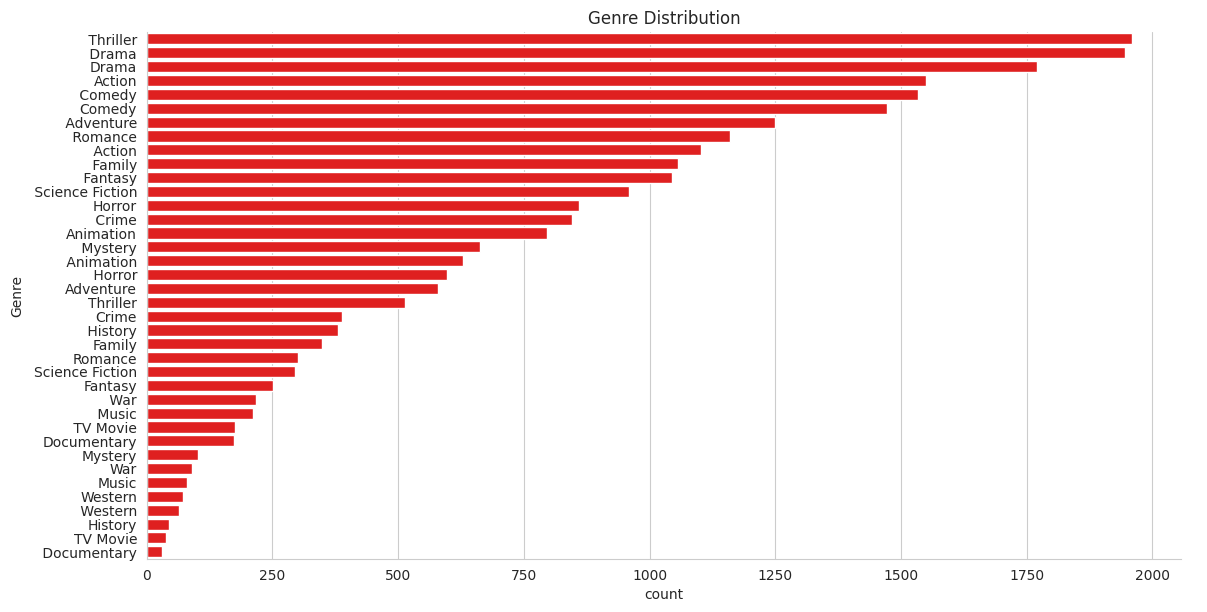

In [29]:
sns.catplot(y ='Genre', kind='count', data=df,
            order = df['Genre'].value_counts().index,
            color='red', height=6, aspect=2)
plt.title('Genre Distribution')
plt.show()

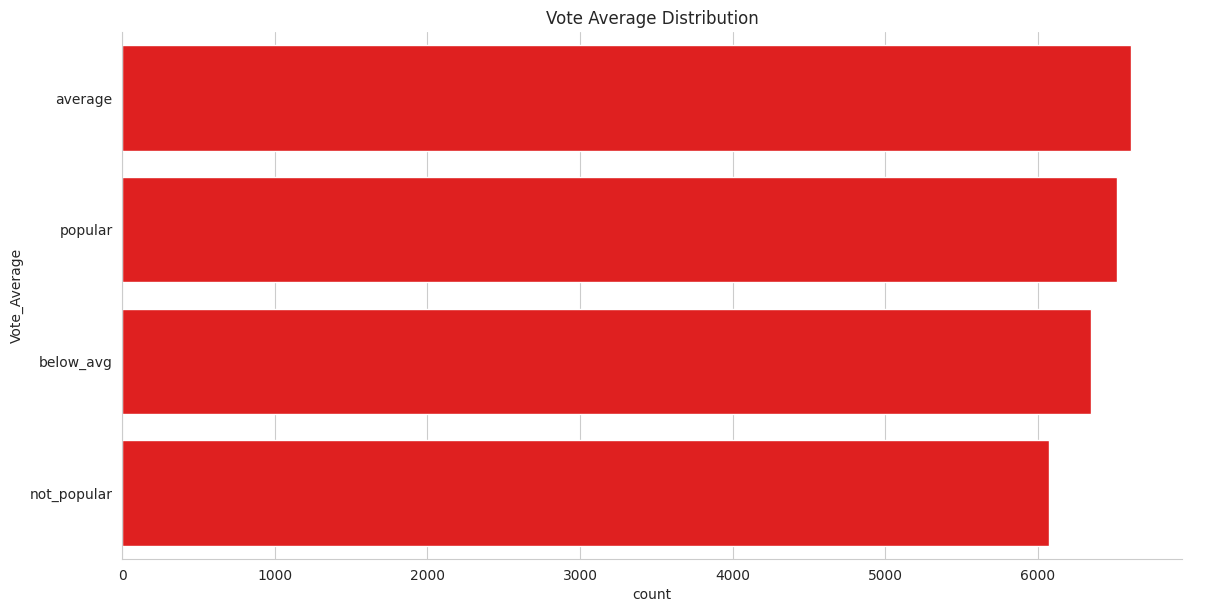

In [30]:
sns.catplot(y ='Vote_Average', kind='count', data=df,
            order = df['Vote_Average'].value_counts().index,
            color='red', height=6, aspect=2)
plt.title('Vote Average Distribution')
plt.show()

In [31]:
df[df['Popularity'] == df['Popularity'].max()][['Title', 'Popularity']]

,Title,Popularity
0,Spider-Man: No Way Home,5083.954
1,Spider-Man: No Way Home,5083.954
2,Spider-Man: No Way Home,5083.954


In [32]:
df[df['Popularity'] == df['Popularity'].min()][['Title', 'Popularity']]

,Title,Popularity
25545,The United States vs. Billie Holiday,13.354
25546,The United States vs. Billie Holiday,13.354
25547,The United States vs. Billie Holiday,13.354
25548,Threads,13.354
25549,Threads,13.354
25550,Threads,13.354


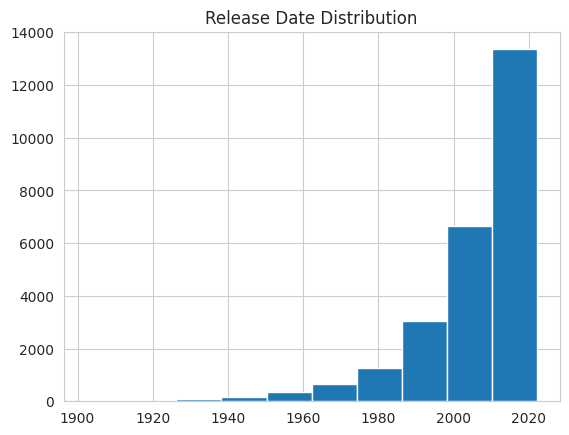

In [33]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()